# Задание 2

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

[[  0.   0.   0.   2.  15.   8.   0.   0.]
 [  0.   0.   0.  11.  16.   4.   0.   0.]
 [  0.   0.   9.  16.  16.   0.   0.   0.]
 [  0.   3.  15.  16.  16.   0.   0.   0.]
 [  0.  12.  16.  16.  16.  14.   6.   0.]
 [  0.   6.  12.  14.  16.  12.   5.   0.]
 [  0.   0.   0.   8.  13.   0.   0.   0.]
 [  0.   0.   0.   2.  14.   1.   0.   0.]]


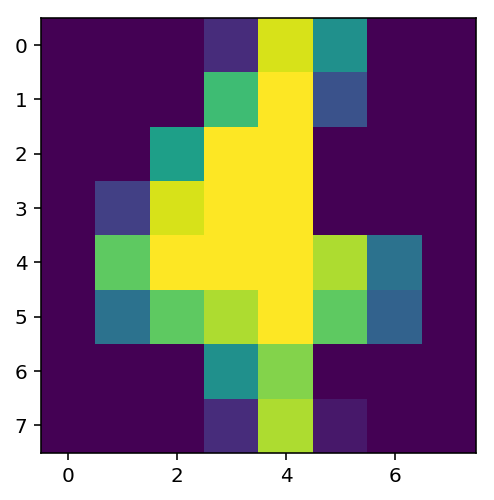

In [61]:
from sklearn import datasets

digits = datasets.load_digits()
cancer = datasets.load_breast_cancer()

print(digits.images[228])
plt.imshow(digits.images[228]);

In [67]:
for f, x in zip(cancer.feature_names, cancer.data[13]):
    print(f'{f}: {x:.2f}')

mean radius: 15.85
mean texture: 23.95
mean perimeter: 103.70
mean area: 782.70
mean smoothness: 0.08
mean compactness: 0.10
mean concavity: 0.10
mean concave points: 0.05
mean symmetry: 0.18
mean fractal dimension: 0.05
radius error: 0.40
texture error: 1.08
perimeter error: 2.90
area error: 36.58
smoothness error: 0.01
compactness error: 0.03
concavity error: 0.05
concave points error: 0.02
symmetry error: 0.03
fractal dimension error: 0.00
worst radius: 16.84
worst texture: 27.66
worst perimeter: 112.00
worst area: 876.50
worst smoothness: 0.11
worst compactness: 0.19
worst concavity: 0.23
worst concave points: 0.11
worst symmetry: 0.28
worst fractal dimension: 0.06


In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import *

classifiers = [BernoulliNB(), MultinomialNB(), GaussianNB()]

### Digits dataset cv-score

In [76]:
for clf in classifiers:
    print(type(clf).__name__, cross_val_score(clf, digits.data, digits.target).mean())

BernoulliNB 0.825823650778
MultinomialNB 0.870877148974
GaussianNB 0.818600380355


Максимальное качество получаем при использованиии классификатора с мультиномиальным распределением - $0.87$.

### Breast cancer dataset cv-score

In [78]:
for clf in classifiers:
    print(type(clf).__name__, cross_val_score(clf, cancer.data, cancer.target).mean())

BernoulliNB 0.627420402859
MultinomialNB 0.894579040193
GaussianNB 0.936749280609


Максимальное качество получаем при распределении Гаусса - $0.94$. 

Как видим, на целых неотрицательных признаках лучше всего себя показало мультиномиальное распределение, на вещественных признаках - нормальное распределение. В случае бинарной классификации скорее всего предпочтительным бы оказалось распределение Бернулли.